# WITH SEABORN

In [99]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [100]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [101]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [102]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [153]:
kill['manner_of_death'].value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [103]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:xlabel='gender', ylabel='age'>

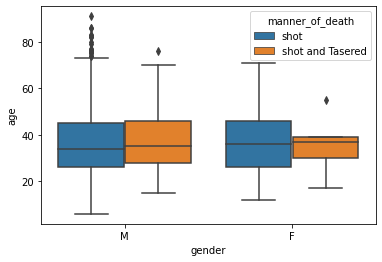

In [104]:
# with seaborn
sns.boxplot(x='gender', y='age',hue="manner_of_death", data=kill)

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

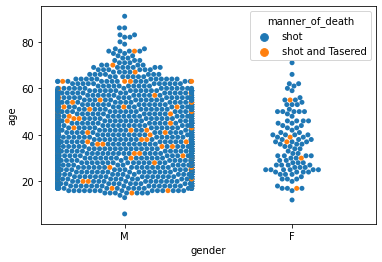

In [105]:
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill);

## 2: Plot 12 most dangerous cities

In [106]:
city = kill.city.value_counts(ascending=False)

kill_city = kill.filter(["city"], axis=1)
kill_city["count"] = 1

grp_city = kill_city.groupby("city", as_index=False,sort=False).sum()
grp_city.sort_index(ascending=False)

grp_city = grp_city.sort_values("count", ascending=False).head(12)  
grp_city

,city,count
40,Los Angeles,39
63,Phoenix,31
71,Houston,27
245,Chicago,25
129,Las Vegas,21
169,San Antonio,20
12,Columbus,19
52,Austin,18
240,Miami,18
48,St. Louis,15


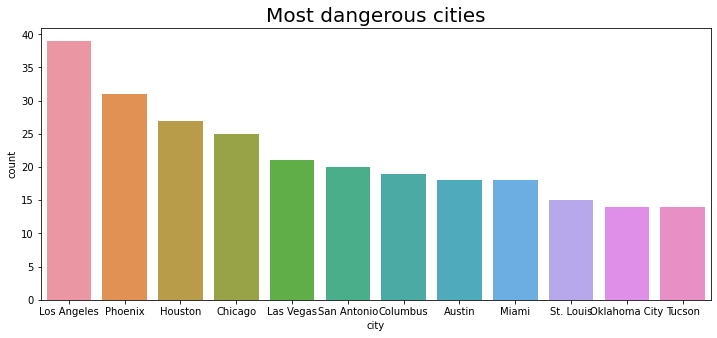

In [107]:
city = kill.city.value_counts(ascending=False)

kill_city = kill.filter(["city"], axis=1)
kill_city["count"] = 1

grp_city = kill_city.groupby("city", as_index=False,sort=False).sum()
grp_city.sort_index(ascending=False)

grp_city = grp_city.sort_values("count", ascending=False).head(12)                                                       

plt.figure(figsize=(12,5))
sns.barplot(data=grp_city, x="city", y="count")
plt.title("Most dangerous cities", fontsize=20);

## 3: Plot 20 most dangerous states

In [108]:
state = kill.state.value_counts(ascending=False)

kill_state = kill.filter(["state"], axis=1)
kill_state["count"] = 1

grp_state = kill_state.groupby("state", as_index=False,sort=False).sum()
grp_state.sort_index(ascending=False)

grp_state = grp_state.sort_values("count", ascending=False).head(12)                                                       

grp_state

,state,count
3,CA,424
9,TX,225
26,FL,154
6,AZ,118
10,OH,79
5,OK,78
4,CO,74
31,GA,70
33,NC,69
19,MO,64


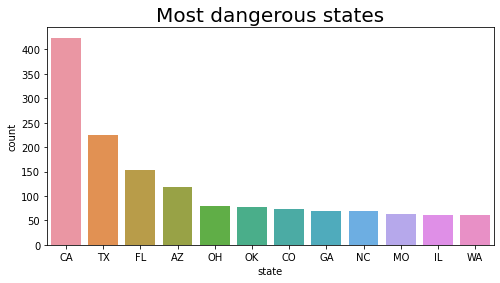

In [109]:
# with seaborn barplot
state = kill.state.value_counts(ascending=False)

kill_state = kill.filter(["state"], axis=1)
kill_state["count"] = 1

grp_state = kill_state.groupby("state", as_index=False,sort=False).sum()
grp_state.sort_index(ascending=False)

grp_state = grp_state.sort_values("count", ascending=False).head(12)                                                       

plt.figure(figsize=(8,4))
sns.barplot(data=grp_state, x="state", y="count")
plt.title("Most dangerous states", fontsize=20);

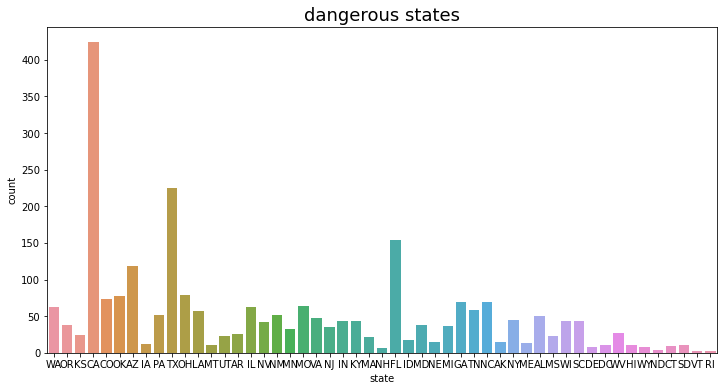

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(data=kill, x=kill.state)
plt.title("dangerous states", fontsize=18);

## 4: Plot Having mental ilness or not for killed people

In [152]:
kill['signs_of_mental_illness'].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

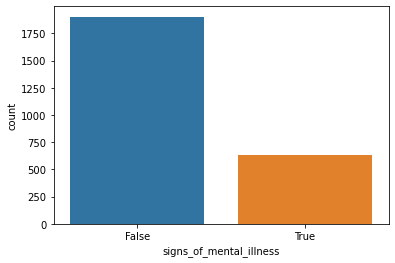

In [147]:
# with seaborn
sns.countplot(x="signs_of_mental_illness", data=kill);

## 5: Plot number of Threat Types

In [151]:
kill['threat_level'].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

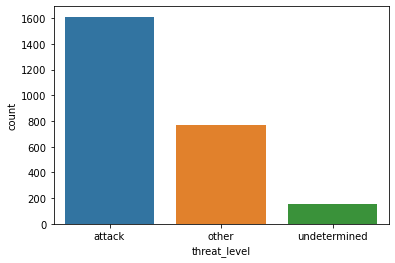

In [148]:
# with seaborn
sns.countplot(data=kill, x="threat_level");

## 6: Plot number of Flee Types

In [150]:
kill['flee'].value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

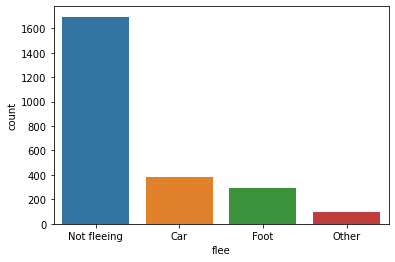

In [154]:
sns.countplot(data=kill, x="flee");